# Flowers Recognition

## 하이퍼 파라미터 : 1. 모듈

In [1]:
#--Tensorflow Framework + SKLEARN
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#--data visualization
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import sys

#--check program performance
import time
import psutil

#--for manipulating image datas
import os
import cv2
from PIL import Image 
import random

## 하이퍼 파라미터 : 2. 데이터셋 위치 지정

In [2]:
FLOWER_ROOT_DIR='../datasets/flowers/flowers'
FLOWER_DAISY_DIR='../datasets/flowers/flowers/daisy'
FLOWER_SUNFLOWER_DIR='../datasets/flowers/flowers/sunflower'
FLOWER_TULIP_DIR='../datasets/flowers/flowers/tulip'
FLOWER_DANDI_DIR='../datasets/flowers/flowers/dandelion'
FLOWER_ROSE_DIR='../datasets/flowers/flowers/rose'

## 하이퍼 파라미터 : 3. 데이터셋 설정

In [3]:
TRAINABLE_FLOWER_DATA = []
LABEL = []
IMG_SIZE=150

## 하이퍼 파라미터 : 4. 학습 설정

In [4]:
BATCH_SIZE=128
EPOCHS=50

## 데이터셋 살펴보기

 **1. 데이터 분류**
 
 - 데이지 꽃(daisy)
 - 민들레 꽃(dandelion)
 - 장미 꽃(rose)
 - 해바라기 꽃(sunflower)
 - 튤립 꽃(tulip

In [5]:
flower_classes = os.listdir(FLOWER_ROOT_DIR)
df = pd.DataFrame(flower_classes, columns=['flower'])
df_dummies = pd.get_dummies(df)
display(df)
display(df_dummies)

,flower
0,daisy
1,dandelion
2,rose
3,sunflower
4,tulip


,flower_daisy,flower_dandelion,flower_rose,flower_sunflower,flower_tulip
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1


**2. 폴더 및 파일 구성**

In [6]:
total = 0
for flower_name in flower_classes:
    num = len(os.listdir(os.path.join(FLOWER_ROOT_DIR, flower_name)))
    total += num
    print(flower_name, num, sep="'s directory :")
print("="*20)
print("TOTAL",total,sep=":")

daisy's directory :769
dandelion's directory :1055
rose's directory :784
sunflower's directory :734
tulip's directory :984
TOTAL:4326


In [7]:
for file_set in [os.listdir(os.path.join(FLOWER_ROOT_DIR, flower_name)) for flower_name in flower_classes]:
    for file in file_set:
        if not file.endswith(".jpg"):
            print(file)

flickr.py
flickr.pyc
run_me.py


**주의 :** *모든 파일이 .jpg로 끝나는 것이 아니라 3개 파일정도의 예외가 있다*

**3. 꽃 이미지 데이터**

In [8]:
daisy_img_names = [ img_name for img_name in os.listdir(FLOWER_DAISY_DIR) ]
daisy_img_names[:10]

['100080576_f52e8ee070_n.jpg',
 '10140303196_b88d3d6cec.jpg',
 '10172379554_b296050f82_n.jpg',
 '10172567486_2748826a8b.jpg',
 '10172636503_21bededa75_n.jpg',
 '102841525_bd6628ae3c.jpg',
 '10300722094_28fa978807_n.jpg',
 '1031799732_e7f4008c03.jpg',
 '10391248763_1d16681106_n.jpg',
 '10437754174_22ec990b77_m.jpg']

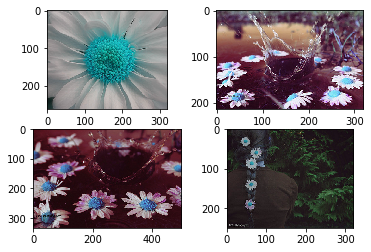

(263, 320, 3)
(215, 320, 3)
(333, 500, 3)
(250, 320, 3)


In [138]:
daisy_sample1 = os.path.join(FLOWER_DAISY_DIR, daisy_img_names[0])
daisy_sample2 = os.path.join(FLOWER_DAISY_DIR, daisy_img_names[2])
daisy_sample3 = os.path.join(FLOWER_DAISY_DIR, daisy_img_names[3])
daisy_sample4 = os.path.join(FLOWER_DAISY_DIR, daisy_img_names[4])

daisy_img_example1 = cv2.imread(daisy_sample1)
daisy_img_example2 = cv2.imread(daisy_sample2)
daisy_img_example3 = cv2.imread(daisy_sample3)
daisy_img_example4 = cv2.imread(daisy_sample4)

plt.subplot(2,2,1)
plt.imshow(daisy_img_example1)
plt.subplot(2,2,2)
plt.imshow(daisy_img_example2)
plt.subplot(2,2,3)
plt.imshow(daisy_img_example3)
plt.subplot(2,2,4)
plt.imshow(daisy_img_example4)
plt.show()

print(daisy_img_example1.shape)
print(daisy_img_example2.shape)
print(daisy_img_example3.shape)
print(daisy_img_example4.shape)

모든 꽃 이미지 size가 다른 것을 볼 수 있다. cv2.resize()함수를 이용해 size를 동일하게 맞춰주는 작업을 확인해보자

In [10]:
daisy_img_example1 = cv2.resize(daisy_img_example1, (IMG_SIZE, IMG_SIZE))
daisy_img_example2 = cv2.resize(daisy_img_example2, (IMG_SIZE, IMG_SIZE))
daisy_img_example3 = cv2.resize(daisy_img_example3, (IMG_SIZE, IMG_SIZE))
daisy_img_example4 = cv2.resize(daisy_img_example4, (IMG_SIZE, IMG_SIZE))

print(daisy_img_example1.shape)
print(daisy_img_example2.shape)
print(daisy_img_example3.shape)
print(daisy_img_example4.shape)

(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)


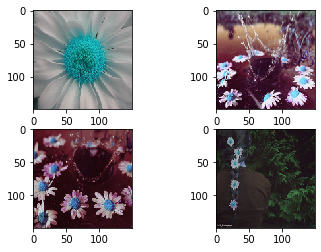

In [11]:
plt.subplot(2,2,1)
plt.imshow(daisy_img_example1)
plt.subplot(2,2,2)
plt.imshow(daisy_img_example2)
plt.subplot(2,2,3)
plt.imshow(daisy_img_example3)
plt.subplot(2,2,4)
plt.imshow(daisy_img_example4)
plt.show()

## 데이터 전처리 방법에 대한 고민

**1. 우선 `Recognition해야할 Flower 데이터를 담은 리스트`와 데이터 리스트에 대한 정답을 담고 있는 `정답 리스트`를 만든다.**

In [12]:
#--메모리 사용을 체크해주는 객체 process 생성
process = psutil.Process(os.getpid())

#--실행전 메모리 상태 체크
before_time = time.perf_counter()
mem_before = process.memory_info().rss / 1024 / 1024

flower_classes = os.listdir(FLOWER_ROOT_DIR)

for flower_name in tqdm(flower_classes):
    
    specific_flower_class_dir = os.path.join(FLOWER_ROOT_DIR, flower_name)
    only_jpg_ext = [img_name for img_name in os.listdir(specific_flower_class_dir) if img_name.endswith('.jpg')]
    
    for img_name in only_jpg_ext:
        
        img = cv2.imread(os.path.join(specific_flower_class_dir, img_name))
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))

        TRAINABLE_FLOWER_DATA.append(np.array(img)/ 255.0)
        LABEL.append(str(flower_name))
    
print("TRAINABLE_FLOWER_DATA 길이 : ", len(TRAINABLE_FLOWER_DATA))
print("LABEL 길이 : ", len(LABEL))

#--실행후 메모리 상태 체크
after_time = time.perf_counter()
mem_after = process.memory_info().rss / 1024 / 1024
total_time = after_time - before_time

print("====== 프로그램 INFO ======")
print('시작 전 메모리 사용량: {} MB'.format(mem_before))
print('종료 후 메모리 사용량: {} MB'.format(mem_after))
print('총 소요된 시간: {:.6f} 초'.format(total_time))

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:16<00:00,  3.24s/it]

TRAINABLE_FLOWER_DATA 길이 :  4323
LABEL 길이 :  4323
====== 프로그램 INFO ======
시작 전 메모리 사용량: 264.36328125 MB
종료 후 메모리 사용량: 2503.640625 MB
총 소요된 시간: 16.216812 초


**2. 학습하기 위해 데이터를 `TRAIN 데이터`와 `TEST 데이터`로 나눈다**

In [13]:
TRAINABLE_FLOWER_DATA = np.array(TRAINABLE_FLOWER_DATA, dtype='float32')
LABEL = np.array(LABEL, dtype=np.str)

In [14]:
print(TRAINABLE_FLOWER_DATA.shape)
print(TRAINABLE_FLOWER_DATA.dtype)
print(LABEL.shape)
print(LABEL.dtype)

(4323, 150, 150, 3)
float32
(4323,)
<U9


In [98]:
encoder = LabelEncoder()
one_hot = encoder.fit_transform(LABEL)
one_hot_label = tf.keras.utils.to_categorical(one_hot, 5)
one_hot_label.shape

(4323, 5)

In [16]:
X_train, X_valid, Y_train, Y_valid = train_test_split(TRAINABLE_FLOWER_DATA, one_hot_label, test_size = 0.25, random_state=42)

## 모델 구성에 대한 고민

**1. CNN 모델 구성하기**

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'SAME', activation ='relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),


    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'SAME', activation ='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),


    tf.keras.layers.Conv2D(filters =96, kernel_size = (3,3),padding = 'SAME', activation ='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    tf.keras.layers.Conv2D(filters = 96, kernel_size = (3,3),padding = 'SAME', activation ='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(5, activation = "softmax")
])

**2. 손실함수, 최적화 알고리즘, 알고리즘 평가지표 설정**

In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 96)        8

**3. Local Minima에 빠져버릴 수도 있으므로 ReduceLROnPlateau를 이용해 Learning Rate를 늘리거나 줄여주는 방법으로 더 이상 학습률이 개선되지 않고 정체되거나 심하게 튀는 현상을 방지해 본다.**

In [20]:
reduce_learning_rate = ReduceLROnPlateau(
    monitor='val_loss',  # 검증 손실을 기준으로 callback이 호출됩니다
    factor=0.5,          # callback 호출시 학습률을 1/2로 줄입니다
    patience=10,         # epoch 10 동안 개선되지 않으면 callback이 호출됩니다
)

**4. 학습 시키기**

In [21]:
history = model.fit(X_train, Y_train, 
      validation_data=(X_valid, Y_valid),
      epochs=EPOCHS, 
      batch_size=BATCH_SIZE, 
      callbacks=[reduce_learning_rate],
      verbose=2
     )

Train on 3242 samples, validate on 1081 samples
Epoch 1/50
3242/3242 - 21s - loss: 1.5392 - accuracy: 0.2899 - val_loss: 1.4307 - val_accuracy: 0.3201
Epoch 2/50
3242/3242 - 16s - loss: 1.1835 - accuracy: 0.4997 - val_loss: 1.1066 - val_accuracy: 0.5476
Epoch 3/50
3242/3242 - 17s - loss: 1.0359 - accuracy: 0.5888 - val_loss: 1.0355 - val_accuracy: 0.5856
Epoch 4/50
3242/3242 - 21s - loss: 0.9579 - accuracy: 0.6107 - val_loss: 0.9322 - val_accuracy: 0.6281
Epoch 5/50
3242/3242 - 25s - loss: 0.8545 - accuracy: 0.6592 - val_loss: 0.9696 - val_accuracy: 0.6253
Epoch 6/50
3242/3242 - 30s - loss: 0.8090 - accuracy: 0.6758 - val_loss: 0.9178 - val_accuracy: 0.6549
Epoch 7/50
3242/3242 - 46s - loss: 0.6898 - accuracy: 0.7301 - val_loss: 1.0295 - val_accuracy: 0.6179
Epoch 8/50
3242/3242 - 34s - loss: 0.6539 - accuracy: 0.7366 - val_loss: 1.0019 - val_accuracy: 0.6559
Epoch 9/50
3242/3242 - 36s - loss: 0.5363 - accuracy: 0.7986 - val_loss: 0.9237 - val_accuracy: 0.6846
Epoch 10/50
3242/3242 - 4

## 모델 성능 평가

In [42]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

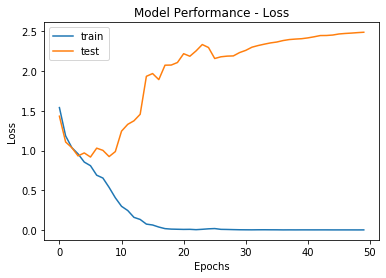

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Performance - Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

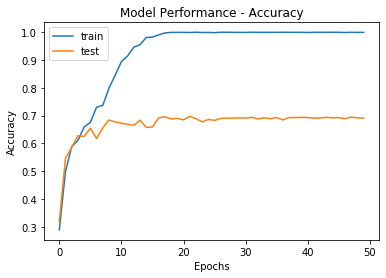

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Performance - Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [41]:
results = model.evaluate(X_valid,  Y_valid, verbose=2)
results

1081/1081 - 2s - loss: 2.4862 - accuracy: 0.6910


[2.486192735006807, 0.6910268]

## 모델 예측

In [56]:
pred=model.predict(X_valid)
pred_digits=np.argmax(pred,axis=1)
pred_digits

array([1, 1, 1, ..., 1, 0, 3], dtype=int64)

In [104]:
"""
i번째의 np.argmax(Y_valid[i])와 pred_digits[i]이 같으면 예측 성공,
반대로 다르면 예측 실패
"""
i = 0
np.argmax(Y_valid[i]), pred_digits[i] 

(1, 1)

In [130]:
pred_flower_11 = encoder.inverse_transform([pred_digits[11]])[0]
pred_flower_22 = encoder.inverse_transform([pred_digits[22]])[0]
pred_flower_33 = encoder.inverse_transform([pred_digits[33]])[0]
pred_flower_44 = encoder.inverse_transform([pred_digits[44]])[0]
pred_flower_55 = encoder.inverse_transform([pred_digits[55]])[0]
pred_flower_66 = encoder.inverse_transform([pred_digits[66]])[0]
pred_flower_77 = encoder.inverse_transform([pred_digits[77]])[0]
pred_flower_88 = encoder.inverse_transform([pred_digits[88]])[0]
pred_flower_99 = encoder.inverse_transform([pred_digits[99]])[0]

In [129]:
actual_flower_11 = encoder.inverse_transform([np.argmax(Y_valid[11])])[0]
actual_flower_22 = encoder.inverse_transform([np.argmax(Y_valid[22])])[0]
actual_flower_33 = encoder.inverse_transform([np.argmax(Y_valid[33])])[0]
actual_flower_44 = encoder.inverse_transform([np.argmax(Y_valid[44])])[0]
actual_flower_55 = encoder.inverse_transform([np.argmax(Y_valid[55])])[0]
actual_flower_66 = encoder.inverse_transform([np.argmax(Y_valid[66])])[0]
actual_flower_77 = encoder.inverse_transform([np.argmax(Y_valid[77])])[0]
actual_flower_88 = encoder.inverse_transform([np.argmax(Y_valid[88])])[0]
actual_flower_99 = encoder.inverse_transform([np.argmax(Y_valid[99])])[0]

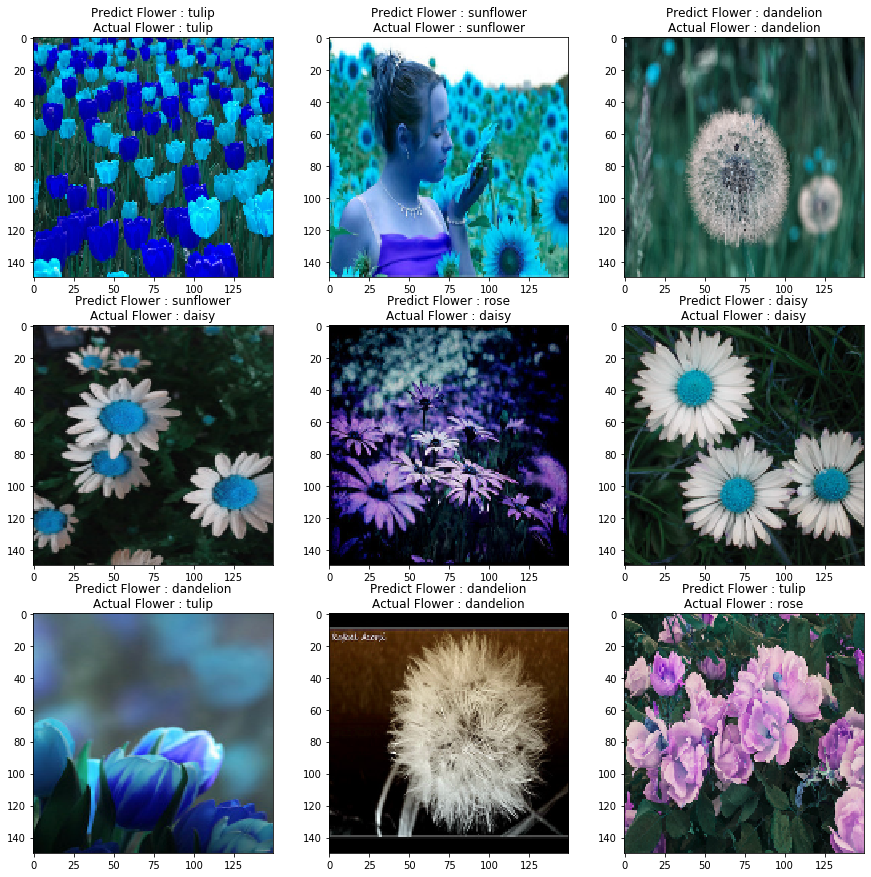

In [134]:
plt.figure(figsize=(15, 15))
plt.subplot(3,3,1)
plt.title("Predict Flower : "+ pred_flower_11+"\nActual Flower : "+actual_flower_11)
plt.imshow(X_valid[11])
plt.subplot(3,3,2)
plt.title("Predict Flower : "+ pred_flower_22+"\nActual Flower : "+actual_flower_22)
plt.imshow(X_valid[22])
plt.subplot(3,3,3)
plt.title("Predict Flower : "+ pred_flower_33+"\nActual Flower : "+actual_flower_33)
plt.imshow(X_valid[33])
plt.subplot(3,3,4)
plt.title("Predict Flower : "+ pred_flower_44+"\nActual Flower : "+actual_flower_44)
plt.imshow(X_valid[44])
plt.subplot(3,3,5)
plt.title("Predict Flower : "+ pred_flower_55+"\nActual Flower : "+actual_flower_55)
plt.imshow(X_valid[55])
plt.subplot(3,3,6)
plt.title("Predict Flower : "+ pred_flower_66+"\nActual Flower : "+actual_flower_66)
plt.imshow(X_valid[66])
plt.subplot(3,3,7)
plt.title("Predict Flower : "+ pred_flower_77+"\nActual Flower : "+actual_flower_77)
plt.imshow(X_valid[77])
plt.subplot(3,3,8)
plt.title("Predict Flower : "+ pred_flower_88+"\nActual Flower : "+actual_flower_88)
plt.imshow(X_valid[88])
plt.subplot(3,3,9)
plt.title("Predict Flower : "+ pred_flower_99+"\nActual Flower : "+actual_flower_99)
plt.imshow(X_valid[99])
plt.show()

## Conclustion
 - 에포크 10부터 급격히 높아지는 오차률과 69.10%의 정확도
 - 에포크 5부터 오버피팅 발생
 - 아마도, 부족한 데이터셋 때문인 듯

In [139]:
# 전체 모델을 HDF5 파일로 저장합니다
model.save('flower_CNN_model.h5')

# new_model = keras.models.load_model('flower_CNN_model.h5')